# 1. Dataset Construction

In [ ]:
import pandas as pd
# Load the data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

#Remove the specified columns
columns_to_remove = ['MonthlyCharges', 'OnlineSecurity', 'StreamingTV', 'InternetService', 'Partner']
df = df.drop(columns=columns_to_remove)
# Verify the shape of the dataset
print(f"Dataset shape: {df.shape}")

# Save the modified dataset
df.to_csv('modified_Telco_Customer_Churn.csv', index=False)

# 2. Model Development

## 2.1 Problem Statement
### Context 
Big Retail, an online retail company in Adelaide, Australia is encounter declining visitor numbers and low conversion rates. To address these challenges, the company is pivoting towards a data-driven strategy, starting with an analysis of customer churn. 
### The Problem 
Customer churn, or customer attrition, is a critical issue for the retail industry. High churn rates can significantly impact the revenue of a company,especially Big Retail. 
The company is experiencing a decline in visitors to its website and conversion rates are low, indication issues with customer retention. 
### Solution 
- Develop a predictive model to identify customers at high risk of churning 
- Uncover key factors contributing to customer churn
- Provide actionable insights to improve customer retention strategies 
### Approach 
- Analyze historical customer data to identify patterns and predictors of churn
- Develop and evaluate a machine learning model (decision tree) to predict customer churn
- Interpret the model results to provide actionable business insights



## 2.2 Exploratory Data Analysis

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('modified_Telco_Customer_Churn.csv')

# Basic statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

       SeniorCitizen       tenure
count    7043.000000  7043.000000
mean        0.162147    32.371149
std         0.368612    24.559481
min         0.000000     0.000000
25%         0.000000     9.000000
50%         0.000000    29.000000
75%         0.000000    55.000000
max         1.000000    72.000000
customerID          0
gender              0
SeniorCitizen       0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
TotalCharges        0
Churn               0
dtype: int64


In [105]:
print(df['TotalCharges'].describe())
print(df['Churn'].value_counts(normalize=True))
print(df.dtypes)

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64
customerID          object
gender              object
SeniorCitizen        int64
Dependents          object
tenure               int64
PhoneService        object
MultipleLines       object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
TotalCharges        object
Churn               object
dtype: object
count     7043
unique    6531
top           
freq        11
Name: TotalCharges_Original, dtype: object


In [106]:
# Separate numeric and categorical columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

print("Numeric columns:", numeric_columns)
print("Categorical columns:", categorical_columns)

Numeric columns: Index(['SeniorCitizen', 'tenure'], dtype='object')
Categorical columns: Index(['customerID', 'gender', 'Dependents', 'PhoneService', 'MultipleLines',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn', 'TotalCharges_Original'],
      dtype='object')


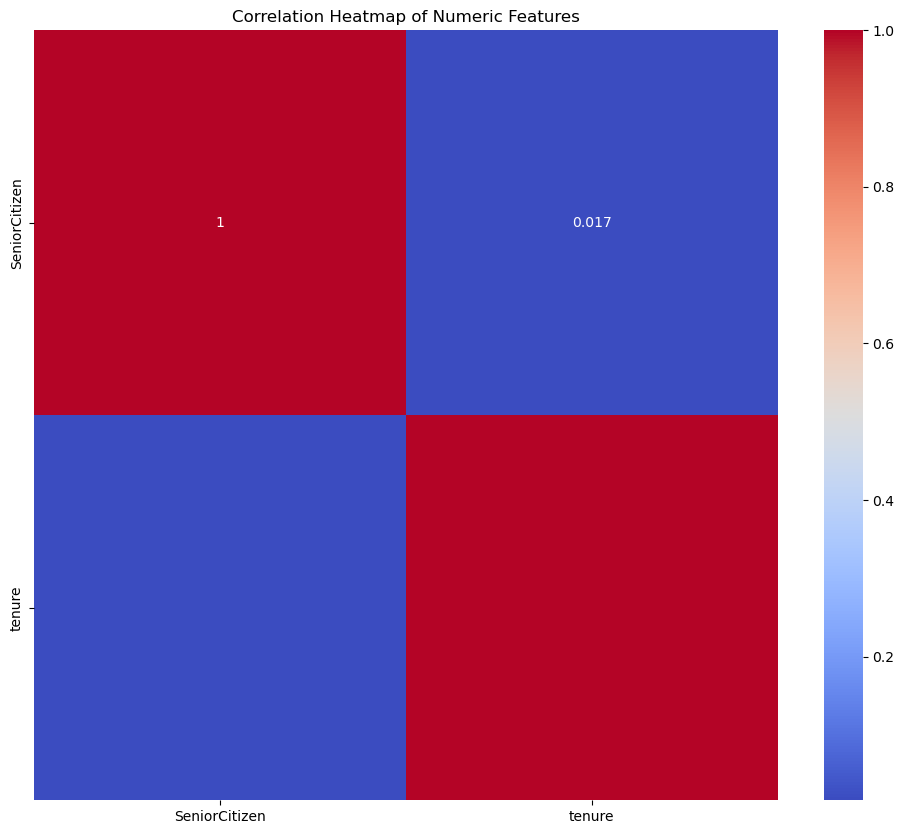

In [107]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

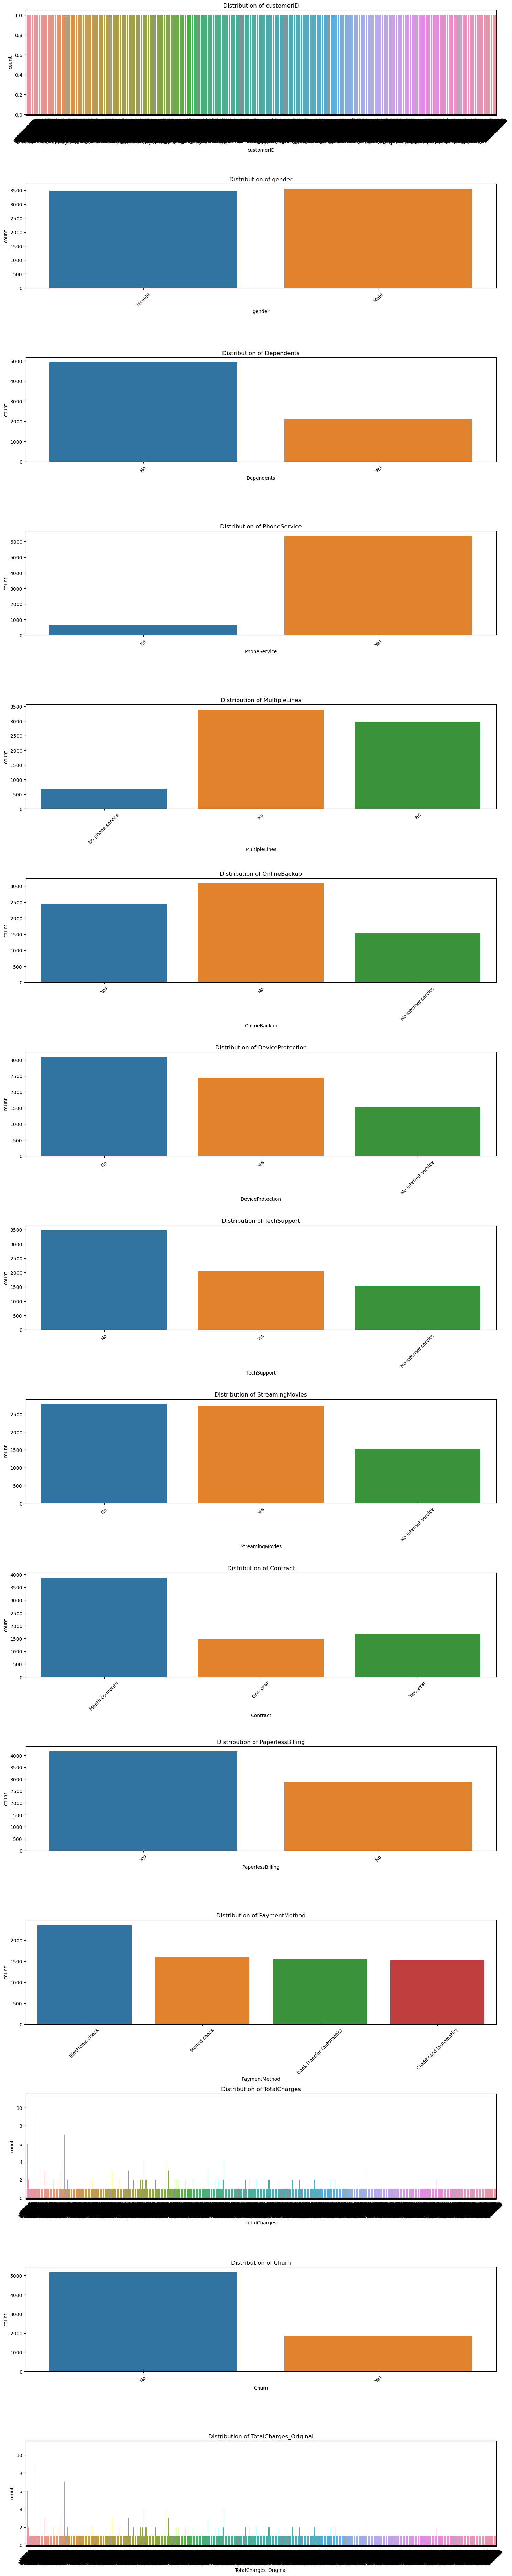

In [108]:
# Distribution of categorical variables
fig, axs = plt.subplots(len(categorical_columns), 1, figsize=(15, 5*len(categorical_columns)))
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axs[i] if len(categorical_columns) > 1 else axs)
    axs[i].set_title(f'Distribution of {col}') if len(categorical_columns) > 1 else axs.set_title(f'Distribution of {col}')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45) if len(categorical_columns) > 1 else axs.set_xticklabels(axs.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


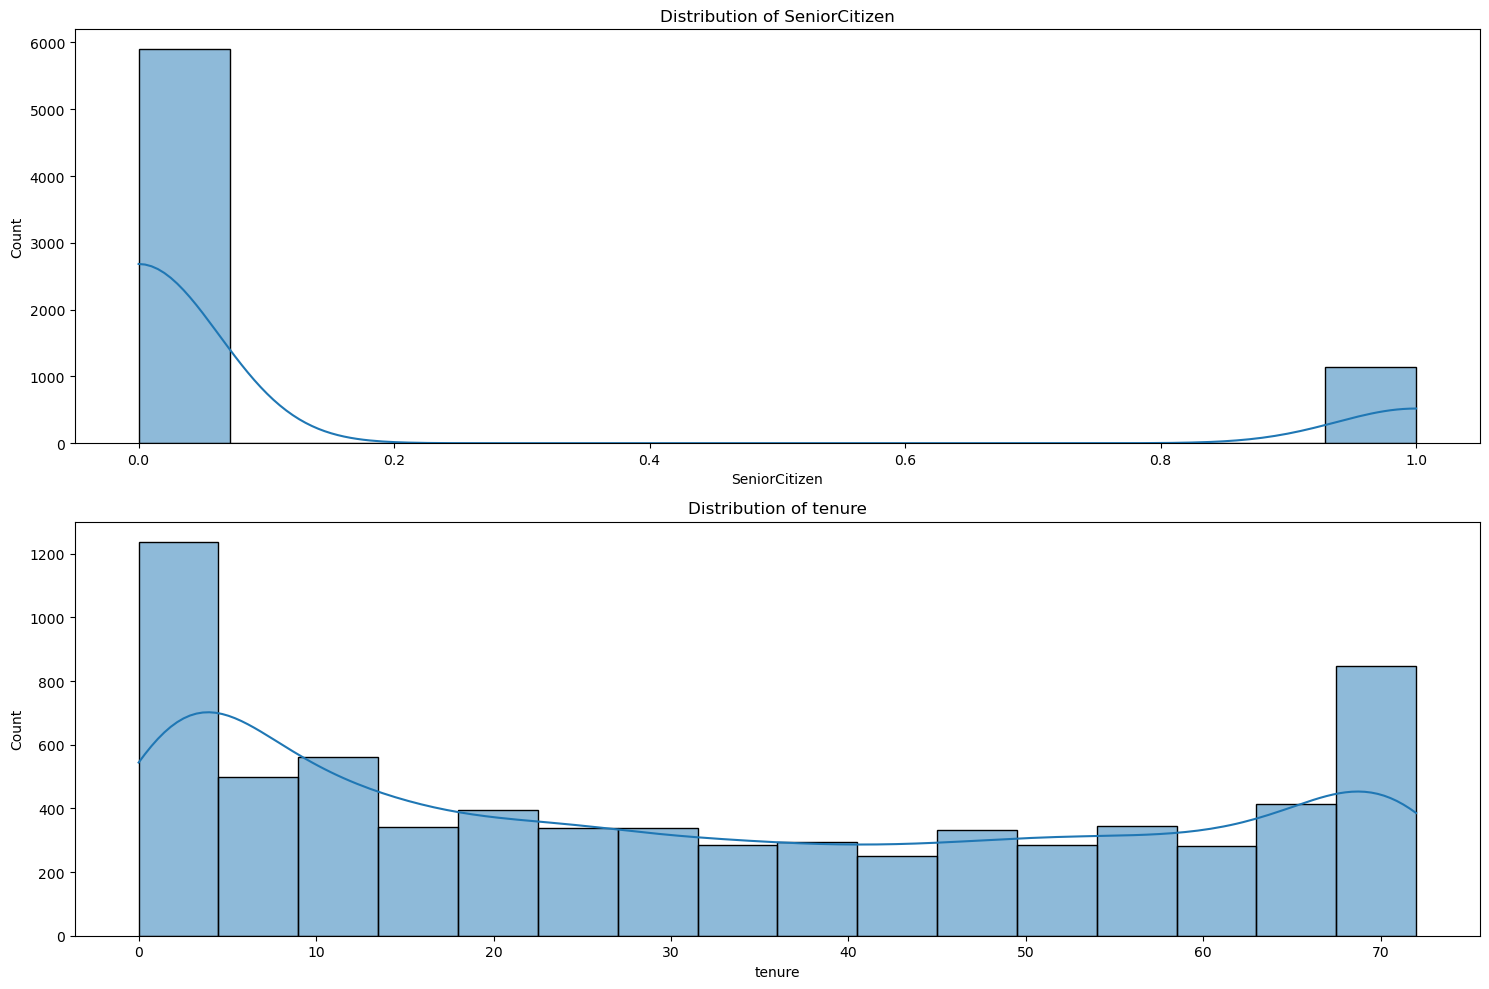

In [109]:
# Distribution of numeric variables
fig, axs = plt.subplots(len(numeric_columns), 1, figsize=(15, 5*len(numeric_columns)))
for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], kde=True, ax=axs[i] if len(numeric_columns) > 1 else axs)
    axs[i].set_title(f'Distribution of {col}') if len(numeric_columns) > 1 else axs.set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

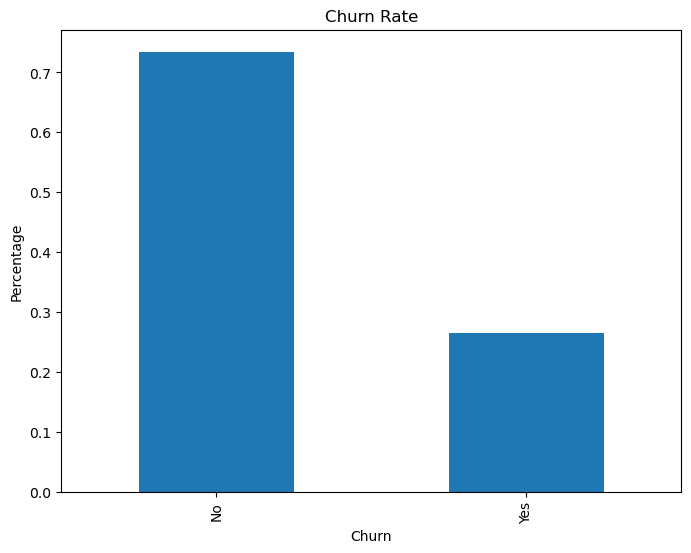

In [110]:
# Churn rate analysis
churn_rate = df['Churn'].value_counts(normalize=True)
plt.figure(figsize=(8, 6))
churn_rate.plot(kind='bar')
plt.title('Churn Rate')
plt.ylabel('Percentage')
plt.show()

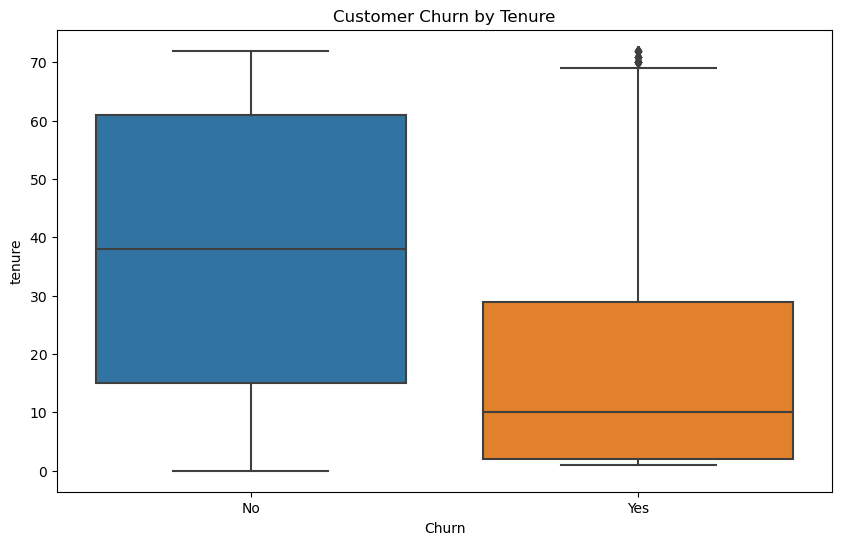

In [111]:
# Analyze churn by tenure
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Customer Churn by Tenure')
plt.show()

## 2.3 Data Cleaning & Feature Selection


In [113]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

# Handle missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print("Missing values before imputation:", df['TotalCharges'].isna().sum())
imputer = SimpleImputer(strategy='mean')
df['TotalCharges'] = imputer.fit_transform(df[['TotalCharges']])
print("Missing values after imputation:", df['TotalCharges'].isna().sum())

# Create a copy of TotalCharges before scaling
df['TotalCharges_Original'] = df['TotalCharges']


# Scale numerical features
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.drop('TotalCharges_Original')
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Properly encode Churn
df['Churn_Binary'] = np.where(df['Churn'] > 0, 1, 0)


# Separate features and target
X = df.drop(['Churn', 'Churn_Binary', 'TotalCharges'], axis=1)
y = df['Churn_Binary']

# Encode categorical variables
le = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Missing values before imputation: 0
Missing values after imputation: 0


## 2.4 Model Building 

In [114]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_params = {'max_depth': [3, 5, 7, 9], 'min_samples_split': [2, 5, 10]}
dt_grid = GridSearchCV(dt_model, dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)

print("Best Decision Tree Parameters:", dt_grid.best_params_)
dt_best = dt_grid.best_estimator_

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [100, 200], 'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10]}
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

print("Best Random Forest Parameters:", rf_grid.best_params_)
rf_best = rf_grid.best_estimator_

# Evaluate models
models = [('Decision Tree', dt_best), ('Random Forest', rf_best)]

for name, model in models:
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("AUC-ROC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

Best Decision Tree Parameters: {'max_depth': 3, 'min_samples_split': 2}
Best Random Forest Parameters: {'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 100}

Decision Tree Results:
Accuracy: 0.7877927608232789
AUC-ROC: 0.8204206216940801

Confusion Matrix:
[[946  90]
 [209 164]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.65      0.44      0.52       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.69      1409
weighted avg       0.77      0.79      0.77      1409


Random Forest Results:
Accuracy: 0.7970191625266146
AUC-ROC: 0.8514263976730464

Confusion Matrix:
[[954  82]
 [204 169]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.67      0.45      0.54       373

    accuracy                           0.80      

## 2.5 Feature Importance and Model Interpretation

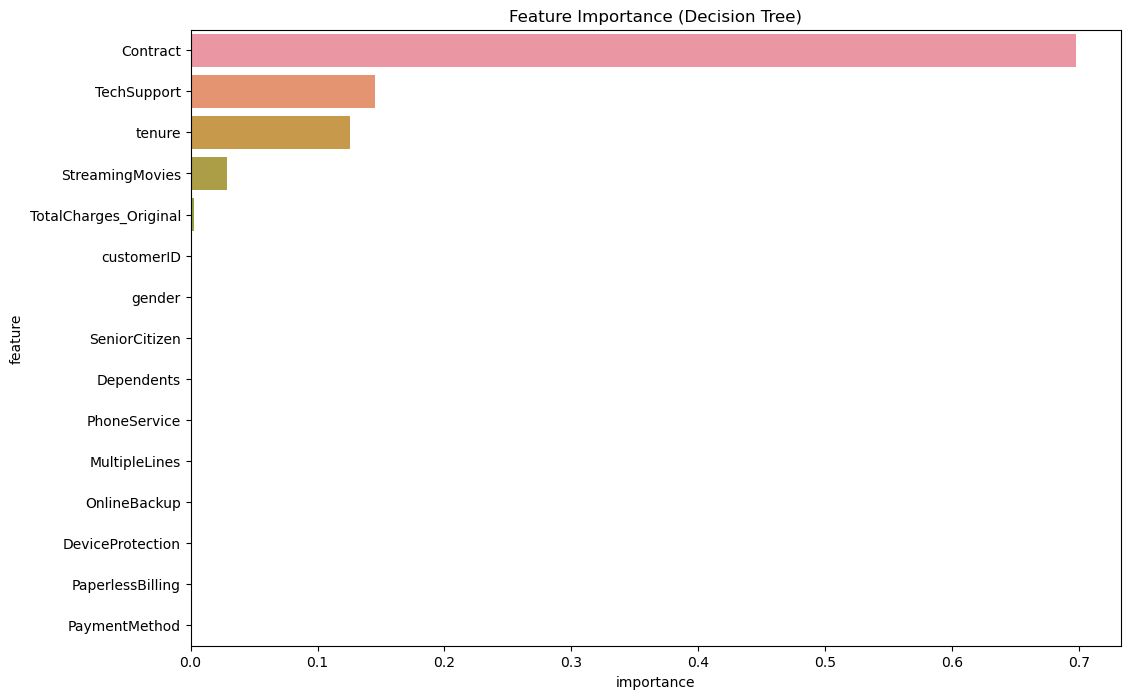

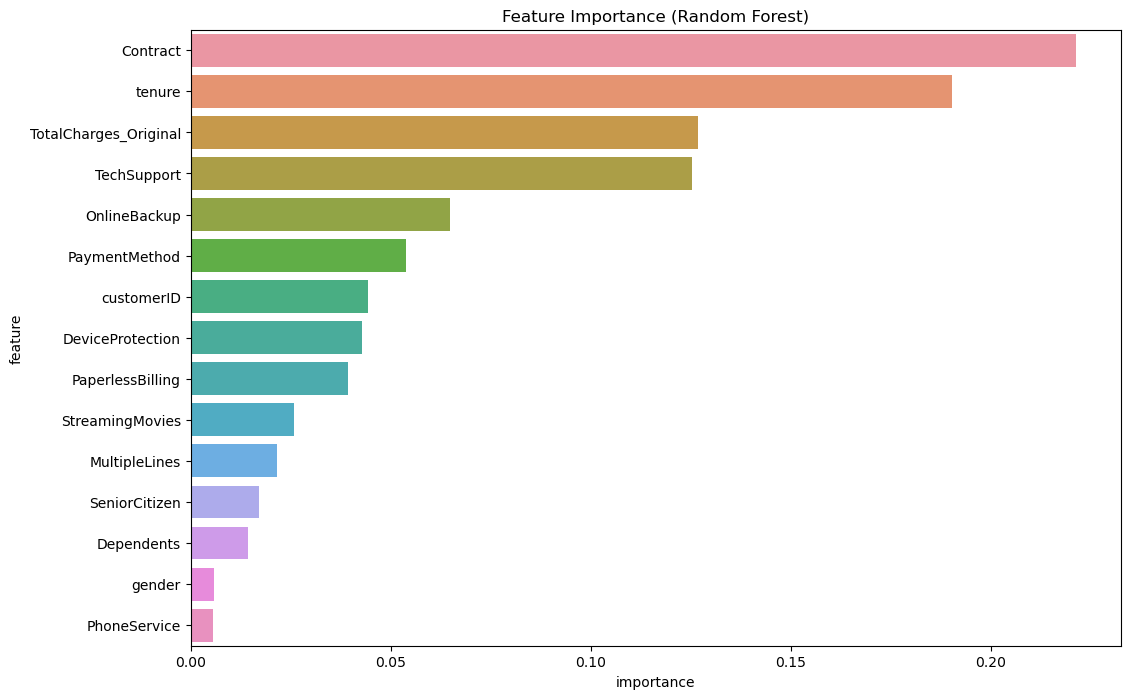

In [115]:
# Decision Tree feature importance
plt.figure(figsize=(12, 8))
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': dt_best.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance (Decision Tree)')
plt.show()

# Random Forest feature importance
plt.figure(figsize=(12, 8))
feature_importance_rf = pd.DataFrame({'feature': X.columns, 'importance': rf_best.feature_importances_})
feature_importance_rf = feature_importance_rf.sort_values('importance', ascending=False)
sns.barplot(x='importance', y='feature', data=feature_importance_rf)
plt.title('Feature Importance (Random Forest)')
plt.show()

## 2.6 Business Insights

In [116]:
import pandas as pd
import numpy as np

# Assuming df is your dataframe and 'Churn_Binary' is your target variable

# Select top features from Random Forest model
top_features = feature_importance_rf.head(5)['feature'].tolist()

# Function to calculate churn rate for each category in a feature
def churn_rate_by_category(feature):
    return df.groupby(feature)['Churn_Binary'].mean().sort_values(ascending=False)

# Calculate churn rate for each top feature
churn_analysis = {feature: churn_rate_by_category(feature) for feature in top_features}

print("Churn Rate Analysis by Top Features:")
for feature, rates in churn_analysis.items():
    print(f"\n{feature}:")
    print(rates)

# Identify high-risk combinations
high_risk_segments = df.groupby(top_features)['Churn_Binary'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 High-Risk Customer Segments:")
print(high_risk_segments)

Churn Rate Analysis by Top Features:

Contract:
Contract
0    0.427097
1    0.112695
2    0.028319
Name: Churn_Binary, dtype: float64

tenure:
tenure
-1.277445    0.619902
-1.236724    0.516807
-1.114563    0.481203
-1.155283    0.471591
-1.196004    0.470000
               ...   
 1.247218    0.055556
 1.287938    0.050000
 1.572981    0.035294
 1.613701    0.016575
-1.318165    0.000000
Name: Churn_Binary, Length: 73, dtype: float64

TotalCharges_Original:
TotalCharges_Original
8684.80    1.0
723.40     1.0
746.50     1.0
4830.25    1.0
4837.60    1.0
          ... 
1215.65    0.0
1215.45    0.0
1215.10    0.0
1212.85    0.0
1549.75    0.0
Name: Churn_Binary, Length: 6531, dtype: float64

TechSupport:
TechSupport
0    0.416355
2    0.151663
1    0.074050
Name: Churn_Binary, dtype: float64

OnlineBackup:
OnlineBackup
0    0.399288
2    0.215315
1    0.074050
Name: Churn_Binary, dtype: float64

Top 10 High-Risk Customer Segments:
Contract  tenure     TotalCharges_Original  TechSupport 

In [117]:
# Identify top churning customer segments
top_churn_features = feature_importance_rf.head(5)['feature'].tolist()
churn_segments = df.groupby(top_churn_features)['Churn'].mean().sort_values(ascending=False).head(10)

print("Top Churning Customer Segments:")
print(churn_segments)

# Calculate potential revenue saved by reducing churn
avg_customer_value = df['TotalCharges_Original'].mean()
print(f"\nAverage Customer Value: ${avg_customer_value:.2f}")
current_churn_rate = df['Churn_Binary'].mean()
print(f"Current Churn Rate: {current_churn_rate:.2f}")
potential_churn_reduction = 0.1 # Assume we can reduce churn by 10%

potential_savings = avg_customer_value * len(df) * current_churn_rate * potential_churn_reduction
print(f"\nPotential Annual Revenue Saved: ${potential_savings:.2f}")


Top Churning Customer Segments:
Contract  tenure     TotalCharges_Original  TechSupport  OnlineBackup
0          0.840014  5149.50                0            2               1.0
          -1.073843  502.85                 2            0               1.0
                     497.55                 0            0               1.0
          -0.259435  2351.80                0            0               1.0
          -1.073843  489.45                 0            2               1.0
          -0.259435  2361.80                0            0               1.0
                     2381.55                0            2               1.0
          -1.073843  477.55                 0            2               1.0
                     474.90                 0            0               1.0
                     469.80                 0            0               1.0
Name: Churn, dtype: float64

Average Customer Value: $2283.30
Current Churn Rate: 0.27

Potential Annual Revenue Saved: $426748.